In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import pandas as pd

In [3]:
sc = SparkContext.getOrCreate()
ss = SparkSession.builder.getOrCreate()

In [4]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import IntegerType
name = 'user_id_hash'
fn = UserDefinedFunction(lambda x: user_dict[x], IntegerType())
add_1 = UserDefinedFunction(lambda x: int(x)+1, IntegerType())

In [5]:

event_rdd = ss.read.csv('features_events.csv', header=True)
session_rdd = ss.read.csv('features_session_training4.0.csv', header=True)
prediction_rdd = ss.read.csv('orange_bears_submission1.csv', header=True)
label_7 = ss.read.csv('labels7.csv',header=True)
label_14 = ss.read.csv('labels14.csv',header=True)

In [6]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import IntegerType
name = 'user_id_hash'
users = pd.read_csv('data/user_dict.csv', header=None)
inv_user_dict = {row[1][0]:row[1][1] for row in users.iterrows()}


In [8]:
fn = UserDefinedFunction(lambda x: inv_user_dict[x], IntegerType())


In [25]:
from pyspark.sql import Column as col
sesh =session_rdd.withColumn("user_id", add_1("id_")).drop("id_")
pred= prediction_rdd.withColumn("user_id", fn("user_id_hash"))
new_7= label_7.withColumn("user_id_1", add_1("user_id"))\
            .drop("user_id")\
            .withColumnRenamed('user_id_1', 'user_id')\
            .withColumnRenamed('label', 'label_7')
new_14 = label_14.withColumn("user_id_1", add_1("user_id"))\
            .drop("user_id")\
            .withColumnRenamed('label', 'label_14')\
            .withColumnRenamed('user_id_1', 'user_id')

In [26]:
from pyspark.sql.functions import *
total = new_14.join(new_7,on='user_id',how='inner')\
        .join(pred,on='user_id',how='inner')\
        .join(sesh,on='user_id',how='inner')\
        .join(event_rdd,on='user_id',how='inner')

In [45]:
from pyspark.sql.types import DoubleType
close = UserDefinedFunction(lambda x,y: __builtin__.abs(float(x)-float(y)), DoubleType())

top_14_fails =total.withColumn('close_14',close('user_purchase_binary_14_days','label_14'))\
                .orderBy('close_14',ascending=False)
top_7_fails =total.withColumn('close_7',close('user_purchase_binary_7_days','label_7'))\
.orderBy('close_7',ascending=False)

In [96]:
week_fails = top_7_fails.orderBy('close_7',ascending=False).limit(10000).toPandas()

In [97]:
tweek_fails = top_14_fails.orderBy('close_14',ascending=False).limit(10000).toPandas()

### Get Errors

In [15]:
import matplotlib
%matplotlib inline

In [98]:

tweek_fails["user_purchase_binary_14_days"] =  tweek_fails.user_purchase_binary_14_days.astype(float)
week_fails["user_purchase_binary_14_days"] =  week_fails.user_purchase_binary_14_days.astype(float)
tweek_fails["user_purchase_binary_7_days"] =  tweek_fails.user_purchase_binary_7_days.astype(float)
week_fails["user_purchase_binary_7_days"] = week_fails.user_purchase_binary_7_days.astype(float)
tweek_fails["purchase_sum_2_weeks"] =  tweek_fails.purchase_sum_2_weeks.astype(float)
week_fails["purchase_sum_2_weeks"] = week_fails.purchase_sum_2_weeks.astype(float)
tweek_fails["purchase_sum_last_week"] =  tweek_fails.purchase_sum_last_week.astype(float)
week_fails["purchase_sum_last_week"] = week_fails.purchase_sum_last_week.astype(float)
tweek_fails["purchase_sum_total"] =  tweek_fails.purchase_sum_total.astype(float)
week_fails["purchase_sum_total"] = week_fails.purchase_sum_total.astype(float)
tweek_fails["purchase_count_2_weeks"] =  tweek_fails.purchase_count_2_weeks.astype(float)
week_fails["purchase_count_2_weeks"] = week_fails.purchase_count_2_weeks.astype(float)
tweek_fails["purchase_count_last_week"] =  tweek_fails.purchase_count_last_week.astype(float)
week_fails["purchase_count_last_week"] = week_fails.purchase_count_last_week.astype(float)
tweek_fails["purchase_count_total"] =  tweek_fails.purchase_count_total.astype(float)
week_fails["purchase_count_total"] = week_fails.purchase_count_total.astype(float)
tweek_fails["last2week_ss_duration"] =  tweek_fails.last2week_ss_duration.astype(float)
week_fails["last2week_ss_duration"] =  week_fails.last2week_ss_duration.astype(float)
tweek_fails["weekday_count"] = tweek_fails.weekday_count.astype(float)
week_fails["weekday_count"] =  week_fails.weekday_count.astype(float)
tweek_fails["weekend_count"] = tweek_fails.weekend_count.astype(float)
week_fails["weekend_count"] = week_fails.weekend_count.astype(float)



In [99]:
week_fails.dtypes

user_id                           int32
label_14                         object
label_7                          object
user_id_hash                     object
user_purchase_binary_14_days    float64
user_purchase_binary_7_days     float64
dummy                            object
cr_from_now                      object
is_developer3                    object
total_count                      object
last2week_count                  object
last5day_count                   object
weekend_count                   float64
weekday_count                   float64
last2week_ss_duration           float64
purchase_count_total            float64
purchase_count_last_week        float64
purchase_count_2_weeks          float64
purchase_sum_total              float64
purchase_sum_last_week          float64
purchase_sum_2_weeks            float64
close_7                         float64
dtype: object

In [100]:
week_fails.head(5)

,user_id,label_14,label_7,user_id_hash,user_purchase_binary_14_days,user_purchase_binary_7_days,dummy,cr_from_now,is_developer3,total_count,...,weekend_count,weekday_count,last2week_ss_duration,purchase_count_total,purchase_count_last_week,purchase_count_2_weeks,purchase_sum_total,purchase_sum_last_week,purchase_sum_2_weeks,close_7
0,386599,1,1,73e8e4513cff510c275439b7d37a6e272fa3bed71078fe...,0.000014,0.000017,0,8.0,0.0,87.0,...,33.0,54.0,8.072151e+08,0.0,0.0,0.0,0.000,0.0,0.000,0.999983
1,604790,1,1,5500e17fef5d8966b73dec54b9ce5583d9dfe8400319c3...,0.000014,0.000017,0,0.0,0.0,21.0,...,11.0,10.0,7.576781e+06,0.0,0.0,0.0,0.000,0.0,0.000,0.999983
2,126925,1,1,72bc98a3c0a3ffba26c88ab4731e3f0fb709a4a9e21bdb...,0.000014,0.000017,0,18.0,0.0,16.0,...,4.0,12.0,3.870584e+06,0.0,0.0,0.0,0.000,0.0,0.000,0.999983
3,586735,1,1,591f1bb67c8b42c61d56bf31b6c46153b7c7d853185ce8...,0.000014,0.000017,0,41.0,0.0,162.0,...,68.0,94.0,3.326772e+09,0.0,0.0,0.0,0.000,0.0,0.000,0.999983
4,334057,1,1,f0dbbd95f3ba79ae2f5d58fd3012f32969594a47c7b1b3...,0.000650,0.000049,0,9.0,0.0,9.0,...,5.0,4.0,2.052489e+07,4.0,0.0,4.0,7.672,0.0,7.672,0.999951


In [23]:
tweek_fails.head(5)

,user_id,label_14,label_7,user_id_hash,user_purchase_binary_14_days,user_purchase_binary_7_days,id_,dummy,cr_from_now,is_developer3,...,weekend_count,weekday_count,last2week_ss_duration,purchase_count_total,purchase_count_last_week,purchase_count_2_weeks,purchase_sum_total,purchase_sum_last_week,purchase_sum_2_weeks,close_14
0,586735,1,1,591f1bb67c8b42c61d56bf31b6c46153b7c7d853185ce8...,1.3922629e-05,1.7071296e-05,586734,0,41.0,0.0,...,68.0,94.0,3326771616.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999986
1,107122,1,0,08d580fda0b4224ba7d51d3ed792f90eafd579b1b80fb0...,1.3922629e-05,1.7071296e-05,107121,0,5.0,0.0,...,6.0,10.0,68481808.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999986
2,229765,1,0,38c1f471911345accd71e40825057742cfb0f473ed2b11...,1.3922629e-05,1.7071296e-05,229764,0,24.0,0.0,...,8.0,26.0,184395145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999986
3,604790,1,1,5500e17fef5d8966b73dec54b9ce5583d9dfe8400319c3...,1.3922629e-05,1.7071296e-05,604789,0,0.0,0.0,...,11.0,10.0,7576781.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999986
4,386599,1,1,73e8e4513cff510c275439b7d37a6e272fa3bed71078fe...,1.3922629e-05,1.7071296e-05,386598,0,8.0,0.0,...,33.0,54.0,807215147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999986


## Predictions vs Real distribution

### 1 week errors dependance on how much we predict for fist week

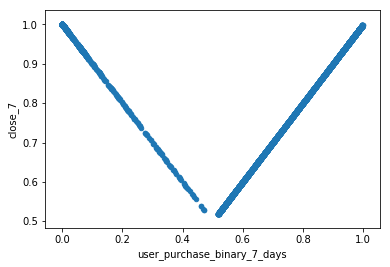

In [101]:
week_fails.plot(x="user_purchase_binary_7_days",y='close_7',kind='scatter')

### 2 week errors dependance on how much we predict for fist week

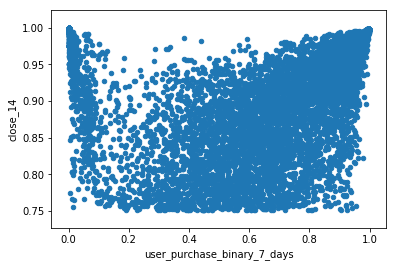

In [102]:
tweek_fails.plot(x="user_purchase_binary_7_days",y='close_14',kind='scatter')

### 1 week errors dependance on how much we predict for second week

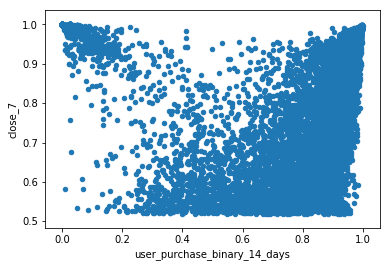

In [103]:
week_fails.plot(x="user_purchase_binary_14_days",y='close_7',kind='scatter')

### 2 week errors dependance on how much we predict for second week

## Correlation of columns with errors. 

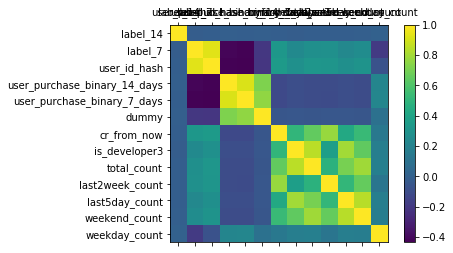

In [125]:
import matplotlib.pyplot as plt
from  matplotlib import ticker
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(week_fails.corr(), interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(week_fails.columns)
ax.set_yticklabels(week_fails.columns)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

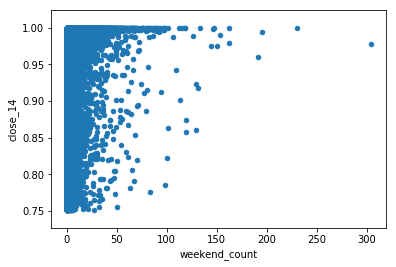

In [107]:
tweek_fails.plot(x="weekend_count",y='close_14',kind='scatter')

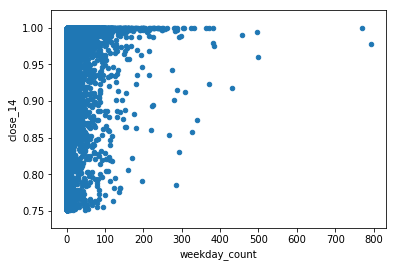

In [108]:
tweek_fails.plot(x="weekday_count",y='close_14',kind='scatter')

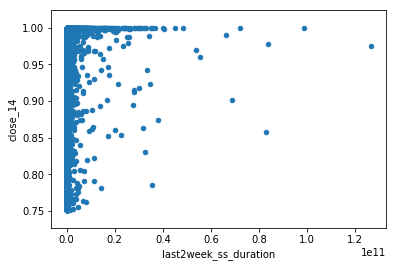

In [109]:
tweek_fails.plot(x="last2week_ss_duration",y='close_14',kind='scatter')

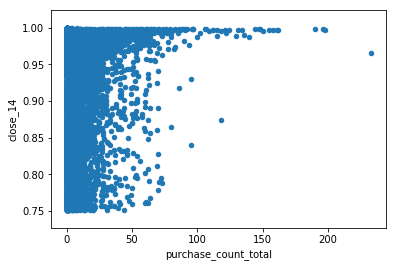

In [110]:
tweek_fails.plot(x="purchase_count_total",y='close_14',kind='scatter')

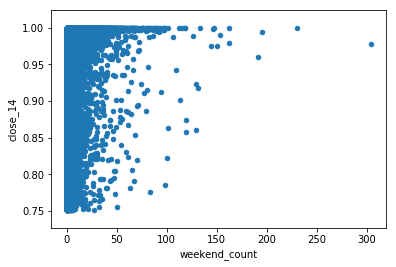

In [111]:
tweek_fails.plot(x="purchase_count_last_week",y='close_14',kind='scatter')

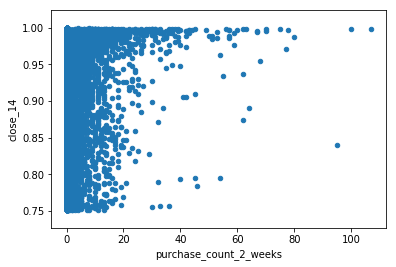

In [112]:
tweek_fails.plot(x="purchase_count_2_weeks",y='close_14',kind='scatter')

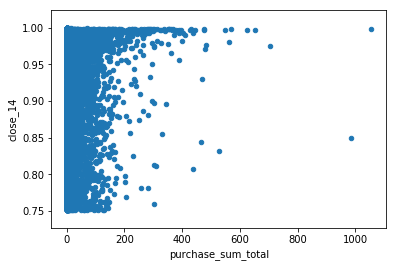

In [113]:
tweek_fails.plot(x="purchase_sum_total",y='close_14',kind='scatter')

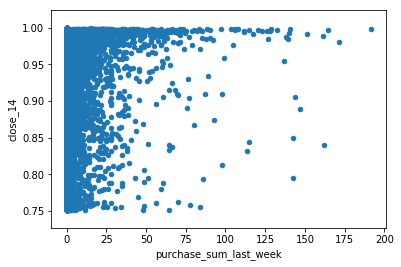

In [114]:
tweek_fails.plot(x="purchase_sum_last_week",y='close_14',kind='scatter')

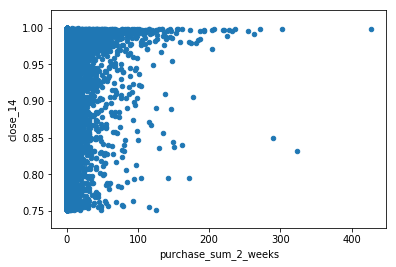

In [115]:
tweek_fails.plot(x="purchase_sum_2_weeks",y='close_14',kind='scatter')

## One week predictions

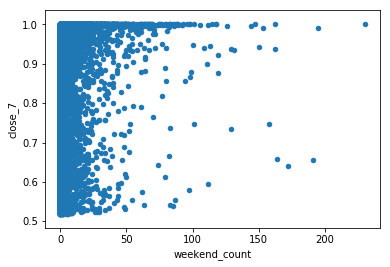

In [126]:
week_fails.plot(x="weekend_count",y='close_7',kind='scatter')

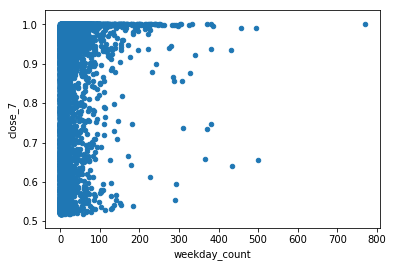

In [127]:
week_fails.plot(x="weekday_count",y='close_7',kind='scatter')

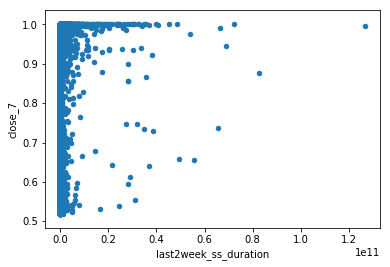

In [128]:
week_fails.plot(x="last2week_ss_duration",y='close_7',kind='scatter')

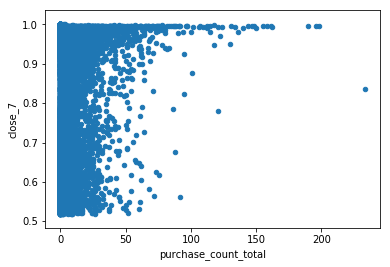

In [129]:
week_fails.plot(x="purchase_count_total",y='close_7',kind='scatter')

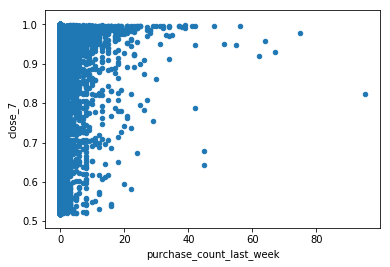

In [130]:
week_fails.plot(x="purchase_count_last_week",y='close_7',kind='scatter')

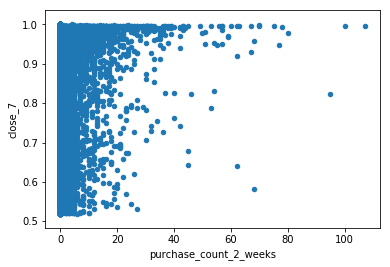

In [131]:
week_fails.plot(x="purchase_count_2_weeks",y='close_7',kind='scatter')

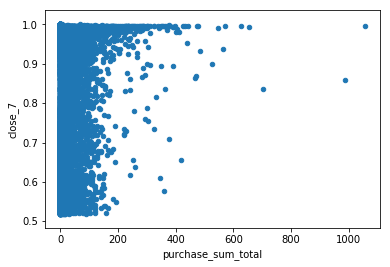

In [132]:
week_fails.plot(x="purchase_sum_total",y='close_7',kind='scatter')

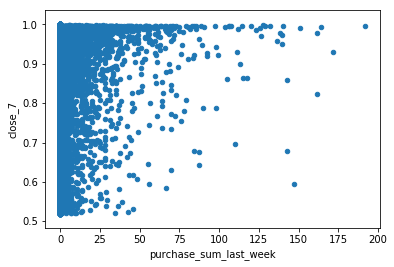

In [133]:
week_fails.plot(x="purchase_sum_last_week",y='close_7',kind='scatter')

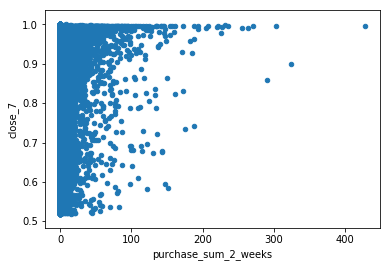

In [134]:
week_fails.plot(x="purchase_sum_2_weeks",y='close_7',kind='scatter')